# Problem Statement

Implement Gradient Descent from Scratch through Simple Linear Regression

# Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Dataset Description

In [2]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [5]:
df.shape

(30, 2)

# Linear Relationship

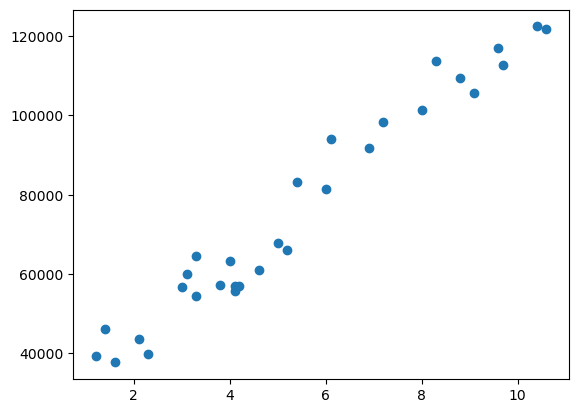

In [6]:
plt.scatter(x = df['YearsExperience'], y = df['Salary'])

# Train-Test Split

In [7]:
X = df['YearsExperience']
y = df['Salary']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8, shuffle = True)

# Linear Regression From Sklearn

Here, internally linear regression is implemented using OLS method.

In [9]:
regressor = LinearRegression()
regressor.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))
r2_score(y_test, regressor.predict(np.array(X_test).reshape(-1, 1)))

0.9631182154839475

The equation of line is **y = mx + b** where m = coefficient and b = intercept

In [10]:
m = regressor.coef_
m

array([[9468.58092734]])

In [11]:
b = regressor.intercept_
b

array([25356.6368477])

In [12]:
x_input = np.linspace(0, 12, 50)
y_input = m * x_input + b
y_input = y_input.reshape(50, -1)

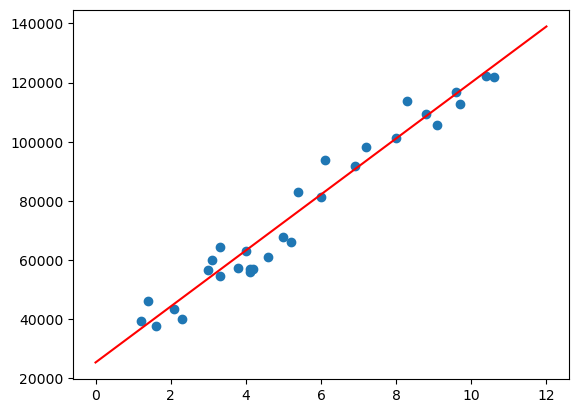

In [13]:
plt.scatter(x = df['YearsExperience'], y = df['Salary'])
plt.plot(x_input, y_input, c = 'r')

# Gradient Descent

In [14]:
class GDRegressor:
    def __init__(self, epochs, learning_rate):
        self.epochs = epochs
        self.lr = learning_rate
        self.m = 6000
        self.b = 1000
        
    def fit(self, X_train, y_train):
        for i in range(self.epochs):
            b_slope = -2 * np.sum(y_train - self.m*X_train.ravel() - self.b)
            m_slope = -2 * np.sum((y_train - self.m*X_train.ravel() - self.b) * X_train.ravel())
            self.b = self.b - (self.lr * b_slope)
            self.m = self.m - (self.lr * m_slope)
        return self.m, self.b
        
    def predict(self, X_test):
        return (self.m * X_test + self.b)

In [15]:
#if learning rate is small, we need high numbers of epochs
gd_regressor = GDRegressor(1200, 0.001)
m, b = gd_regressor.fit(X_train, y_train)

In [16]:
m, b

(9468.631350659156, 25356.284574768822)

In [17]:
y_pred = gd_regressor.predict(X_test)
r2_score(y_test, y_pred)

0.963118955906533